## Welcome!  My name is Avi Rabin and I am a sophomore studying Data and Computer Science at the University of California, Berkeley.  This is my python notebook analyzing a dataset from Kaggle.com on degrees from different colleges and the salaries resulting from those degrees.  

### This is my first independent exploration not related to a school project and purely for fun.  I'm mostly familiarizing myself with the pandas and matplotlib libraries here.  As I went along, I tried to connect findings to the previous section (you'll see what I mean as you go along).

### There's a few things I want to find:

#### 1. How do incomes for graduates of state and private schools fair at entry and  mid career levels?

#### 2. How do incomes by region fair at entry and mid career levels?

#### 3. Which Science and Engineering degree earns the most and least money at entry and mid career levels?

#### 4. Which Science and Engineering degrees see the most and least financial mobility?

#### 5. Conclusion (or TLDR)

### Part 0: Our datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-poster')
from pylab import rcParams
rcParams.update({'font.size': 40})
import numpy as np

In [3]:
degrees = pd.read_csv("degrees-that-pay-back.csv")
collegesalaries = pd.read_csv("salaries-by-college-type.csv")
regionsalaries = pd.read_csv("salaries-by-region.csv")

First I just want to see what is in each table.  Starting with our database on salaries by college type, let's see what there is available.

Below are the first five rows of the collegesalaries table.

In [4]:
collegesalaries[:5]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


Interestingly, I guess "Party" is a category for a school?  I don't know how much people at those schools might appreciate this categorization.  What differentiates a "Party" school from a "State" school?

In [5]:
collegesalaries[collegesalaries['School Type'] == "Party"][:5]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
19,University of Illinois at Urbana-Champaign (UIUC),Party,"$52,900.00","$96,100.00","$48,200.00","$68,900.00","$132,000.00","$177,000.00"
20,"University of Maryland, College Park",Party,"$52,000.00","$95,000.00","$50,400.00","$68,300.00","$126,000.00","$166,000.00"
21,"University of California, Santa Barbara (UCSB)",Party,"$50,500.00","$95,000.00","$51,300.00","$71,200.00","$129,000.00","$173,000.00"
22,University of Texas (UT) - Austin,Party,"$49,700.00","$93,900.00","$50,100.00","$67,400.00","$129,000.00","$188,000.00"
23,State University of New York (SUNY) at Albany,Party,"$44,500.00","$92,200.00","$47,000.00","$63,100.00","$135,000.00","$209,000.00"


I don't see any reason to inclue the school type column as it seems arbitrary.  UIUC and Berkeley both have phenomenal engineering departments.  I'd rather just look at all of the information as binary between private and state. All of the party schools are state schools except for Randolph-Macon College, so let's relabel them as such.  All of the engineering schools, liberal arts colleges, and Ivy League universities are private, so we can relabel them as such, too.

In [6]:
stype = collegesalaries['School Type']
for i in range(len(stype)):
    if stype[i] == 'Party':
        if collegesalaries['School Name'][i] != 'Randolph-Macon College':
            stype[i] = 'State'
        else: 
            stype[i] = 'Private'
    elif stype[i] == 'Engineering' or stype[i] == 'Liberal Arts' or stype[i] == 'Ivy League':
        stype[i] = 'Private'

Let's take a look at our two other tables now, degrees and regionsalaries.

In [7]:
degrees[:5]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [8]:
regionsalaries[:5]

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


The only difference between regionsalaries and collegesalaries is the presence of a Region and School Type Column, so let's join them together.

In [9]:
colleges = pd.merge(collegesalaries, regionsalaries)
regions = regionsalaries
colleges[:5]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Private,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Private,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Private,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Private,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Private,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern


We now have the regions and colleges tables I'd like to work with, so let's get started.

### Part 1. State v. Private

Let's group our colleges table into private and state tables.  First I want to convert all of the Strings representing numbers into actual numbers.  A very few number of rows have missing values so I just replace them with the value in the row above.  I am going to aggregate the data so a few thousand off here or there among 260 rows will have a miniscule effect.

In [10]:
def turn_to_float(temptable):  
    for col in temptable:
        for row in range(len(temptable[col])):
            if type(temptable[col][row]) == float:
                temptable[col][row] = temptable[col][row-1]
            elif temptable[col][row][0] == "$":
                temptable[col][row] = float(temptable[col][row][1:].replace(',', ''))
turn_to_float(colleges)

In [11]:
private = colleges[colleges['School Type'] == 'Private']
state = colleges[colleges['School Type'] == 'State']
schooltype = colleges.copy()
schooltype.drop(['School Name', 'Region'], 1, inplace = True)

I created a visualization below to illustrate how there is a clear disparity in income from those who graduate from state and private schools.  The first graph makes it pretty clear that cumulatively, graduates of private schools are earning more.  Below that I also show a series of pie charts that show that at every individual level, graduates of private schools are earning more.

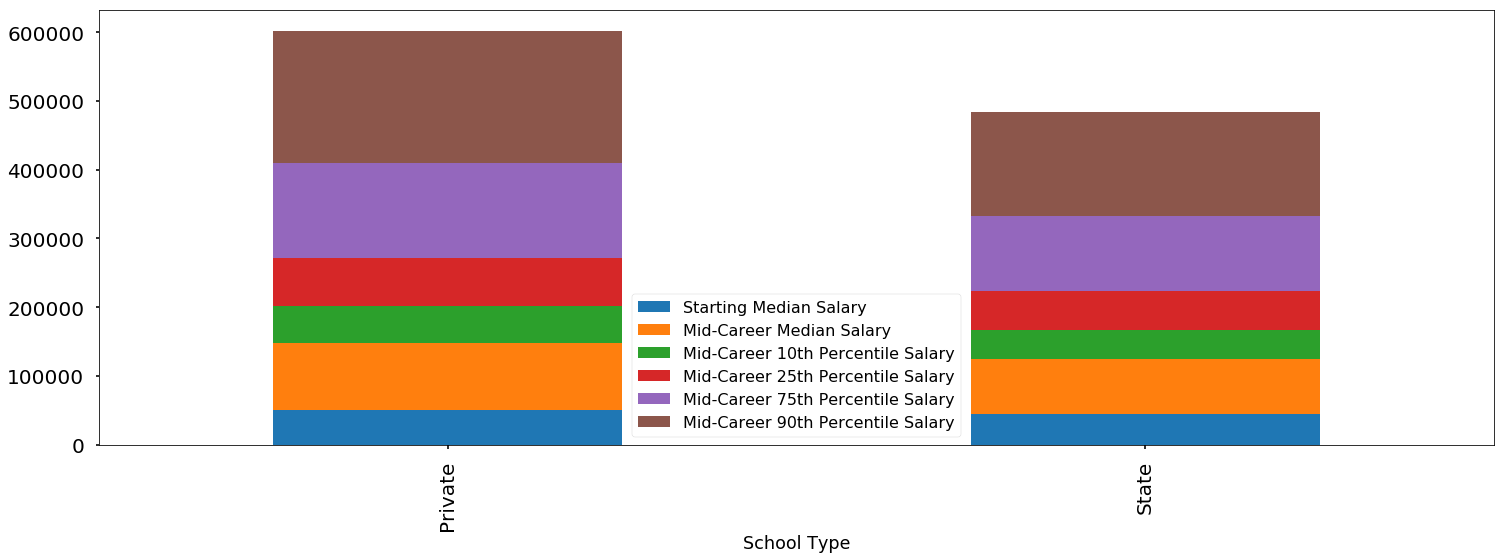

In [12]:
#groupby wasn't working with mean()
schooltype = schooltype.groupby('School Type').sum() / schooltype.groupby('School Type').count()
_ = schooltype.plot(kind='bar', figsize = [25, 8], fontsize=20, stacked=True)

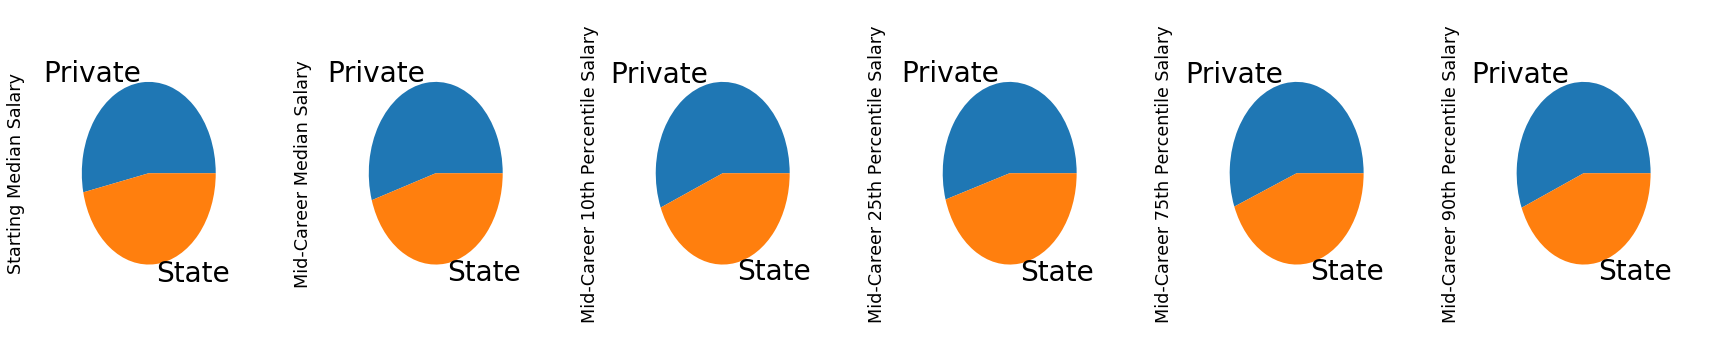

In [13]:
rcParams.update({'font.size': 22})
_ = schooltype.plot(kind='pie', subplots=True, figsize=[30, 6], fontsize=28, radius = .7, legend=None)

That's enough for now.  The fact that, at these levels, graduates of private schools make more money raises more questions about the confounding variables present.  Are there just regions of the country with more private schools and those regions also happen to make more money?  Do private schools offer programs (enginering or business perhaps?) that aren't present at every state school?  Is the cost of living significantly higher in these areas?

### Part 2. Regions and State vs. Private

For this section I'm going to start by graphing and then making observations.

In [14]:
turn_to_float(regions)
regions.drop(['School Name'], 1, inplace=True)

Below is a table of the income of graduates in every region, at every career level, stacked upon one another.

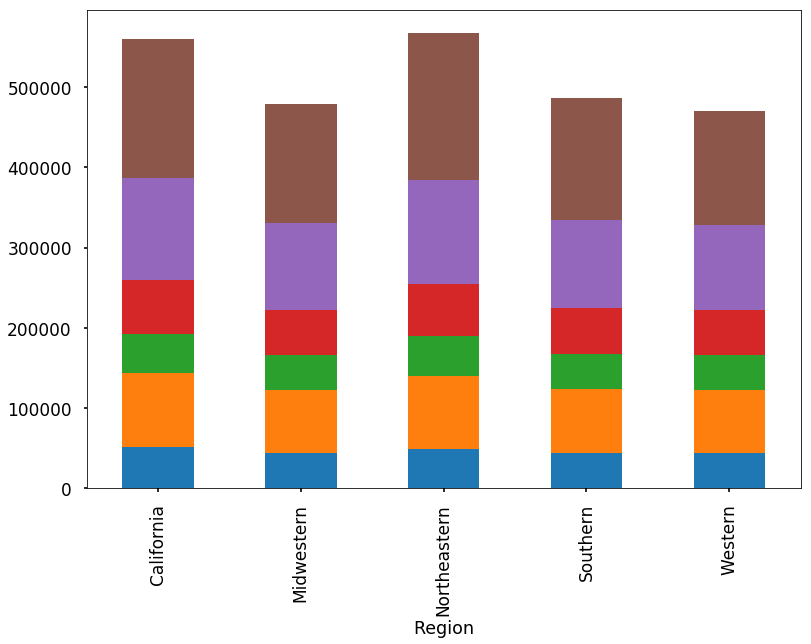

In [18]:
regions_grouped = regions.groupby('Region').sum() / regions.groupby('Region').count()
_ = regions_grouped.plot(kind='bar', fontsize = 17, stacked=True, legend=None)

Below is a series of horizontal bar graphs of each region and career level:

###### Starting Median Salary:

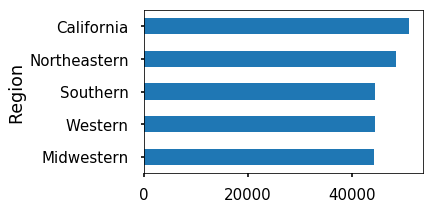

In [20]:
_ = regions_grouped['Starting Median Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3])

###### Mid-Career 10th Percentile Salary:

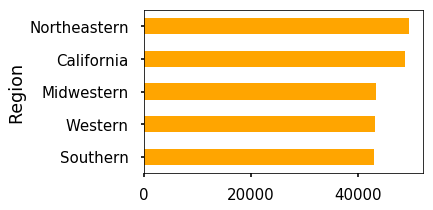

In [21]:
_ = regions_grouped['Mid-Career 10th Percentile Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3], color = 'orange')

###### Mid-Career 25th Percentile Salary:

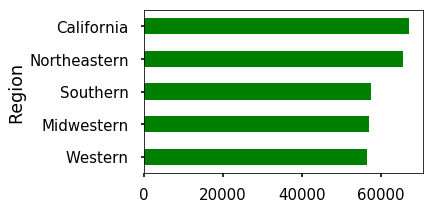

In [22]:
_ = regions_grouped['Mid-Career 25th Percentile Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3], color = 'green')

###### Mid-Career Median Salary:

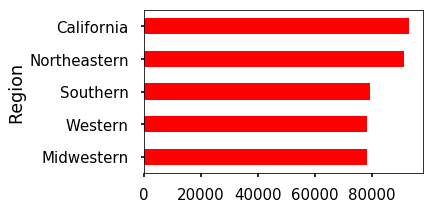

In [23]:
_ = regions_grouped['Mid-Career Median Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3], color = 'red')

###### Mid-Career 75th percentile Salary:

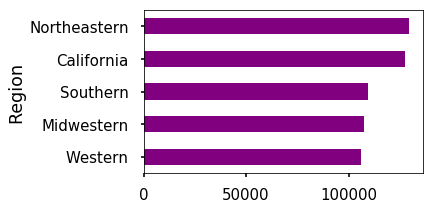

In [24]:
_ = regions_grouped['Mid-Career 75th Percentile Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3], color = 'purple')

###### Mid-Career 90th Percentile Salary:

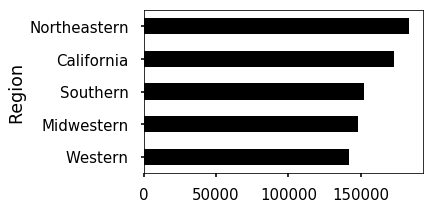

In [25]:
_ = regions_grouped['Mid-Career 90th Percentile Salary'].sort_values().plot(kind='barh', fontsize=15, legend=None, figsize=[5, 3], color = 'black')

Below I prepare the table so that it can graph a line for each region at the different percentiles of salary at the mid-career level.

In [29]:
regions_grouped = regions_grouped.drop('Starting Median Salary', axis=1)

ValueError: labels ['Starting Median Salary'] not contained in axis

In [35]:
titles = list(regions_grouped)
titles[0], titles[1], titles[2] = titles[1], titles[2], titles[0]
regions_grouped = regions_grouped.reindex(columns=titles)
regions_grouped

,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career Median Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Region,,,,,
California,48782.142857,67153.571429,93132.142857,127350.000000,172678.571429
Midwestern,43270.422535,57026.760563,78180.281690,107594.366197,148222.535211
Northeastern,49545.000000,65479.000000,91352.000000,129576.000000,183470.000000
Southern,43045.569620,57506.329114,79505.063291,109662.025316,152378.481013
Western,43114.285714,56580.952381,78200.000000,106026.190476,141785.714286


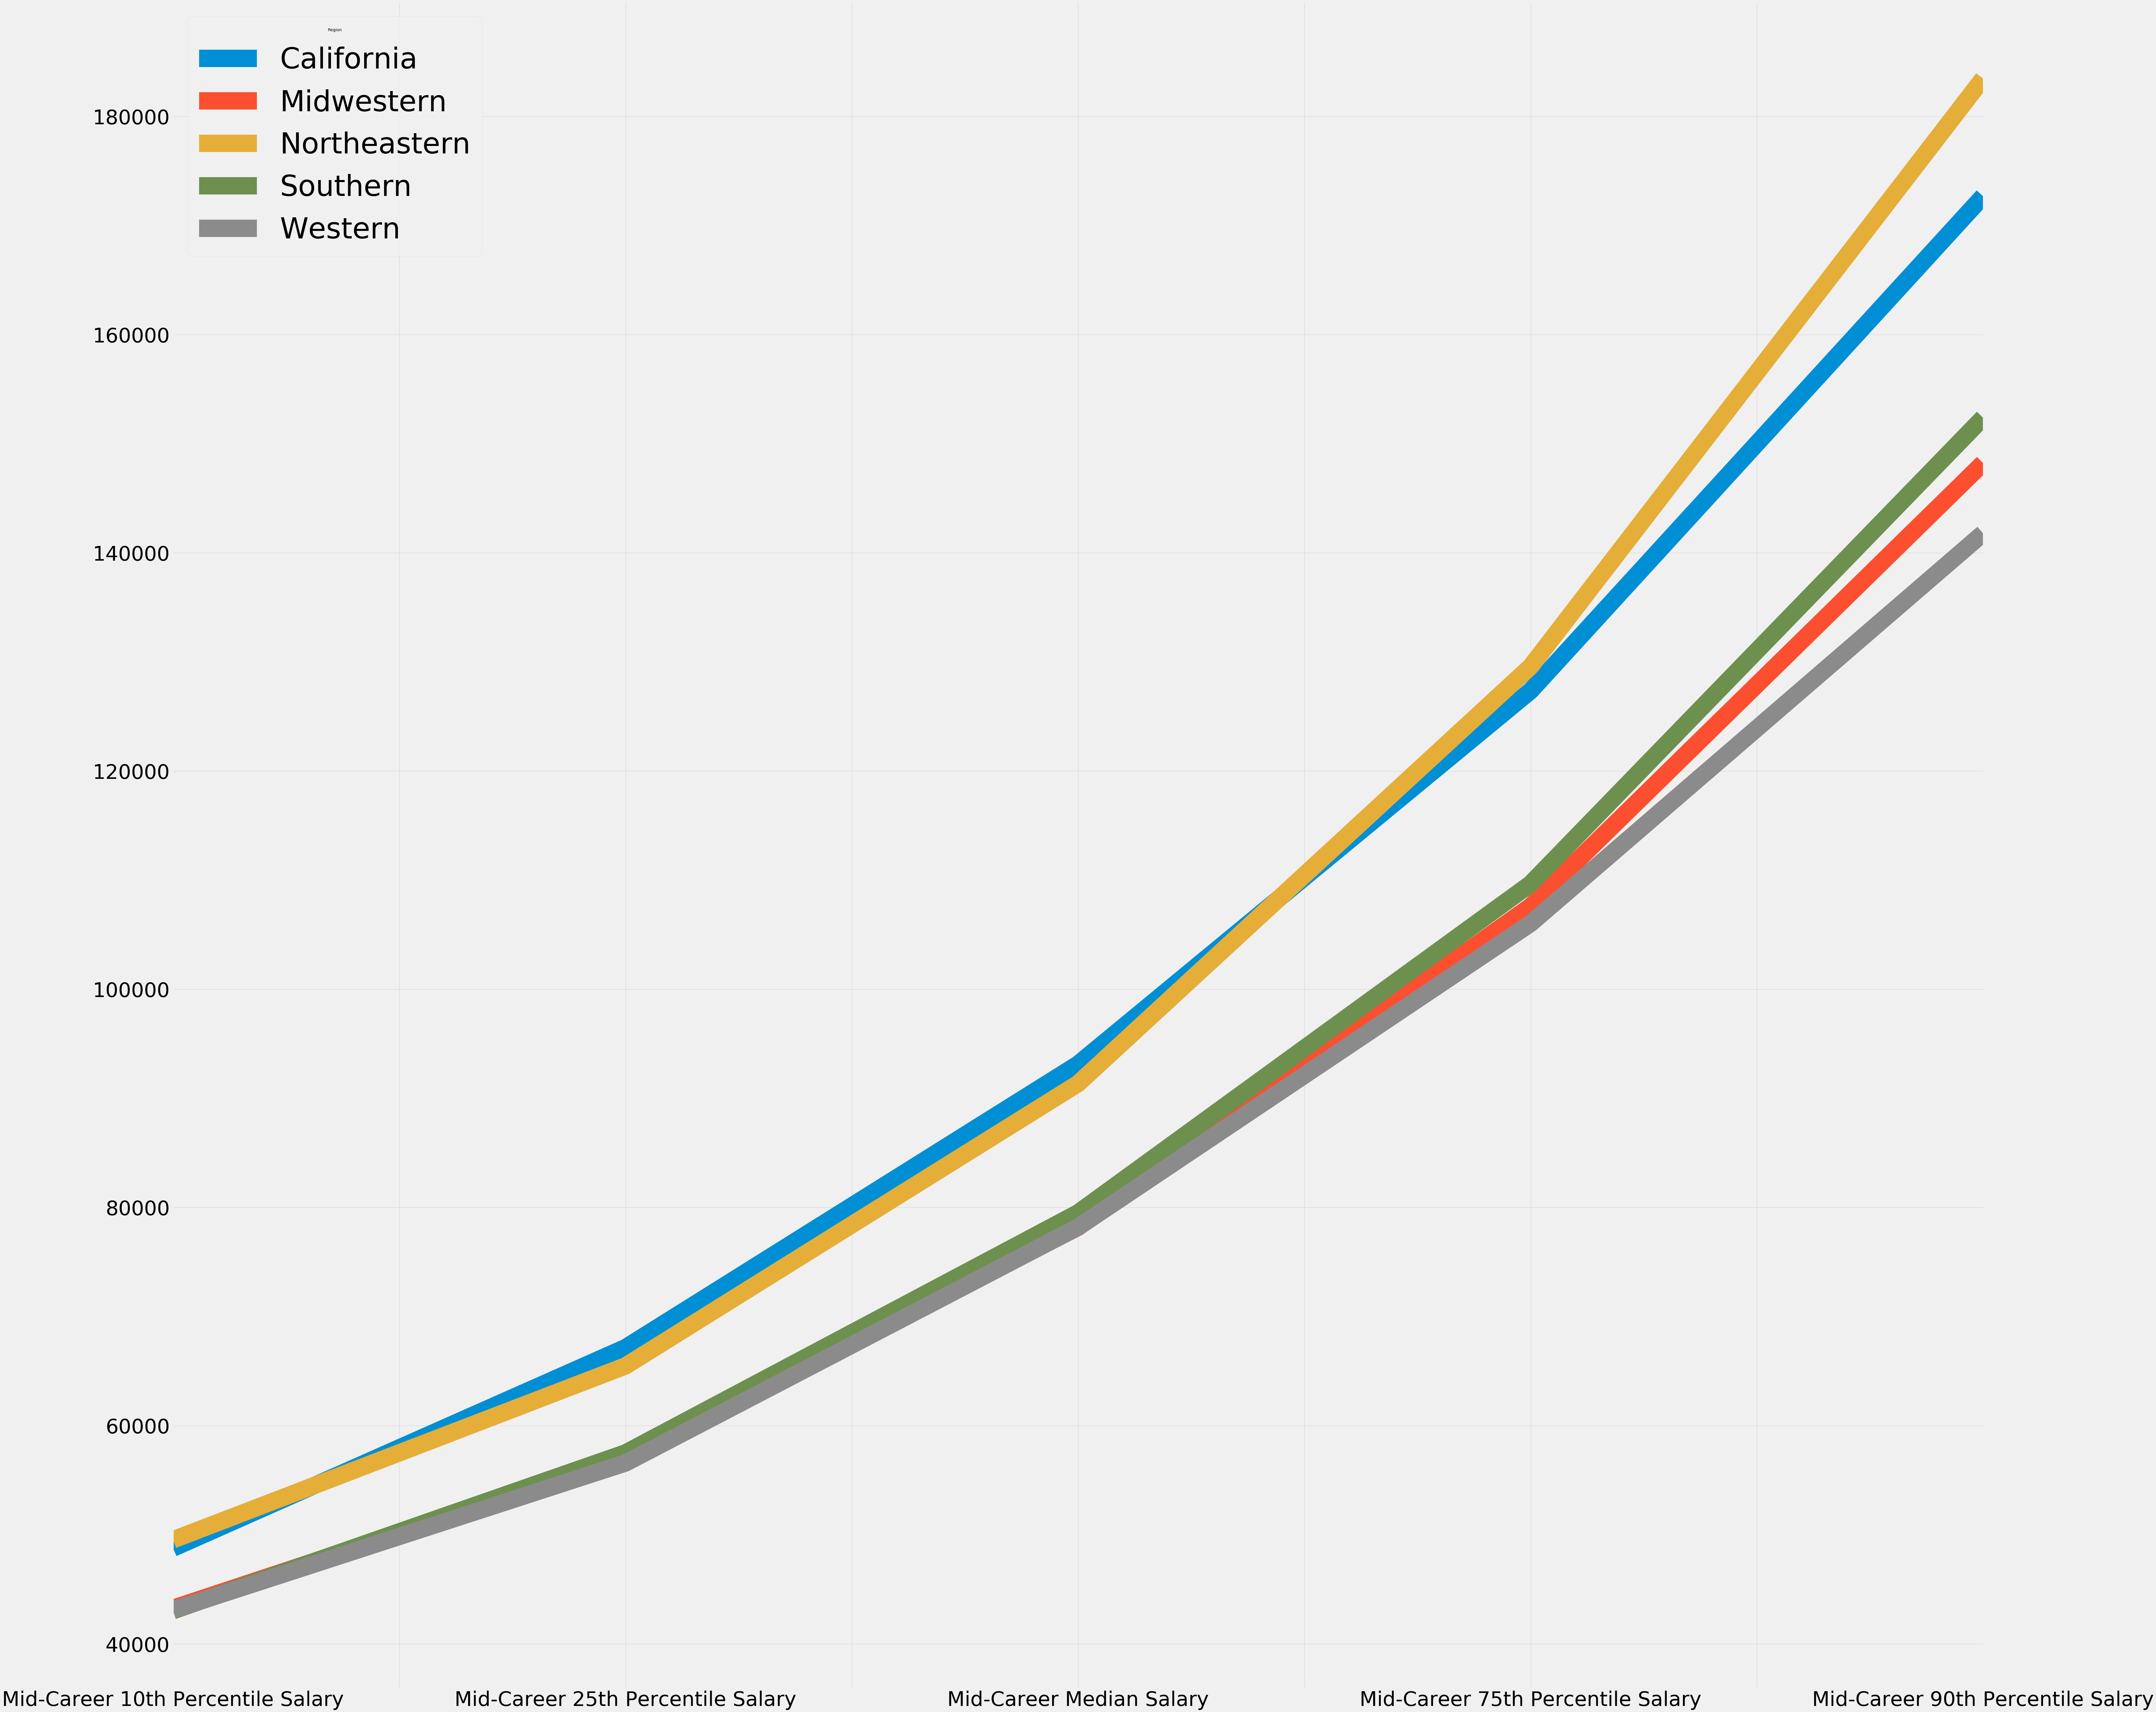

In [36]:
plt.style.use("fivethirtyeight")
plt.rc('legend',**{'fontsize':100})
plt.rc('lines', linewidth=60)
_ = regions_grouped.T.plot(kind='line', figsize=[100, 100], fontsize=70)

Very self explanatory graphs.  I first found that at every level of income listed in the data set, the California and Northeastern regions dominated.  The last graph illustrates by how much.  What can I learn about these individual colleges?  The first question that pops into my mind is what proportion of them are private and state.

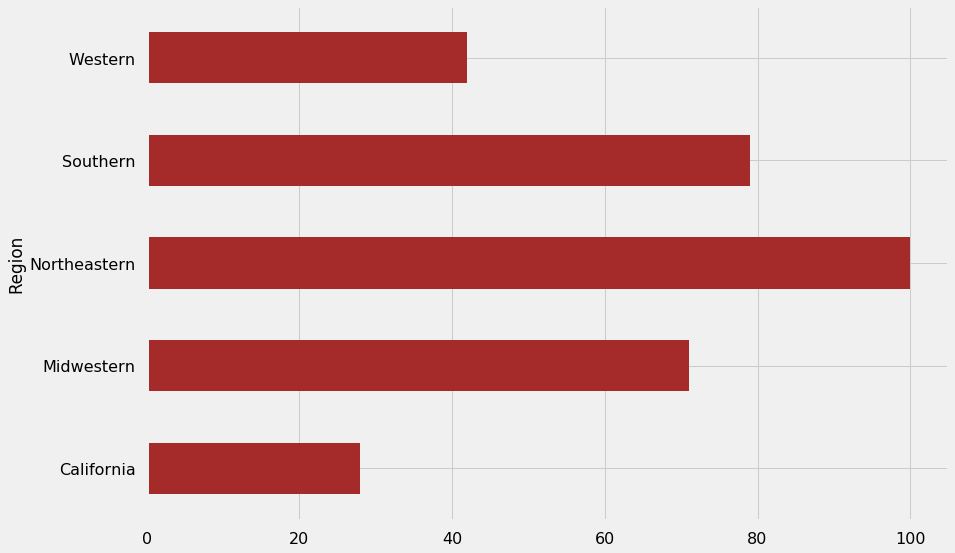

In [37]:
allregions = regions.groupby('Region').count()['Starting Median Salary']
_ = allregions.plot(kind='barh', color = 'brown')

Clearly number of colleges has no association.  The region with the most and fewest number of colleges had graduates with the highest salaries.  Let's try this again, but looking at just the private schools in these regions and then just the state schools.

In [38]:
private = colleges.where(colleges['School Type']=='Private').drop(['School Name', 'School Type'], axis=1).groupby('Region').count()['Starting Median Salary']
state = colleges.where(colleges['School Type']=='State').drop(['School Name', 'School Type'], axis=1).groupby('Region').count()['Starting Median Salary']
state, private = state / (state + private), private / (state + private)

In [39]:
def percentify(table):
    for col in table:
        table[col] = col*100
percentify(private)
percentify(state)

In [40]:
for row in range(5):
    private[row] = private[row+5]
    state[row] = state[row+5]
private = private[:5]
state = state[:5]

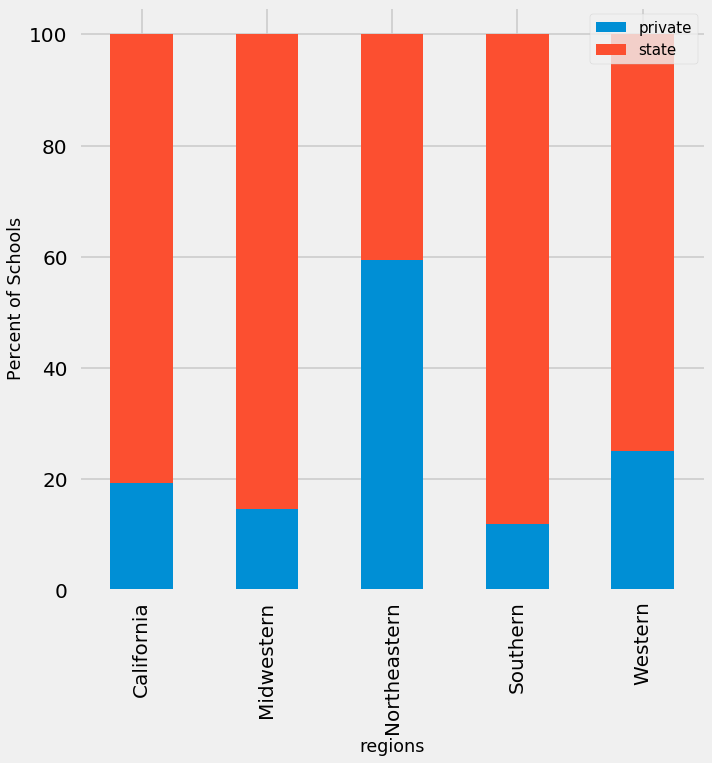

In [41]:
both = pd.DataFrame({'state': state.values, 'private': private.values, 'regions': private.index})
both = both.set_index('regions')
plt.style.use("seaborn-poster")
plt.rc('legend',**{'fontsize':15})
plt.rc('lines', linewidth=30)
_ = both.plot(kind='bar', stacked=True, figsize=[10, 10], fontsize=20)
_.set_ylabel('Percent of Schools')
_ = _

Now we're seeing something.  Northeastern schools, which tend to have very high earners, have a way higher percentage of private schools.  This doesn't explain why California does well, though.

### Part 3. Engineering and Science

Let's take a look at some Engineering and Science degrees.

In [42]:
degrees[:3]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"


The majors I'm looking for will have science and engineering in the title.  I'll have to manually add a few more like Math and Chemistry.  I'm also going to remove political science.

In [43]:
stem = degrees.copy()

In [44]:
stemdegrees = ['Chemistry', 'Biology', 'Agriculture', 'Forestry', 'Geology', 'Information Technology (IT)', 'Math', 'Physics', 'Psychology']
engineering = [i for i in stem['Undergraduate Major'] if 'Engineering' in i or 'Science' in i]
stemdegrees = engineering + stemdegrees
stem = stem.where(stem['Undergraduate Major'].isin(stemdegrees))
stem = stem.drop(45)

In [45]:
stem = stem.dropna()
change = stem.copy()
stem = stem.drop('Percent change from Starting to Mid-Career Salary', axis=1)

In [46]:
stem.index=np.arange(stem.count()[0])
turn_to_float(stem)

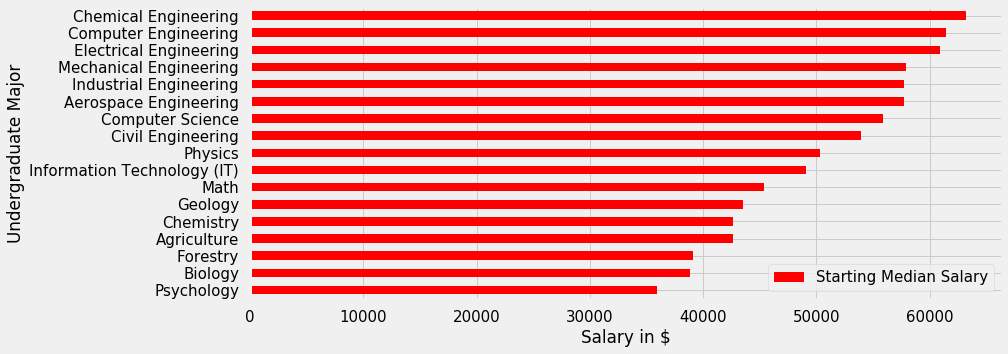

In [47]:
stem.index = stem['Undergraduate Major']
starting = stem[['Undergraduate Major', 'Starting Median Salary']]
plt.style.use('fivethirtyeight')
_ = starting.sort_values('Starting Median Salary').plot(kind='barh', color = 'red', fontsize=15, figsize=[12, 5]).set_xlabel('Salary in $')

The engineering degrees easily outperformed the other degrees at the start of their careers.

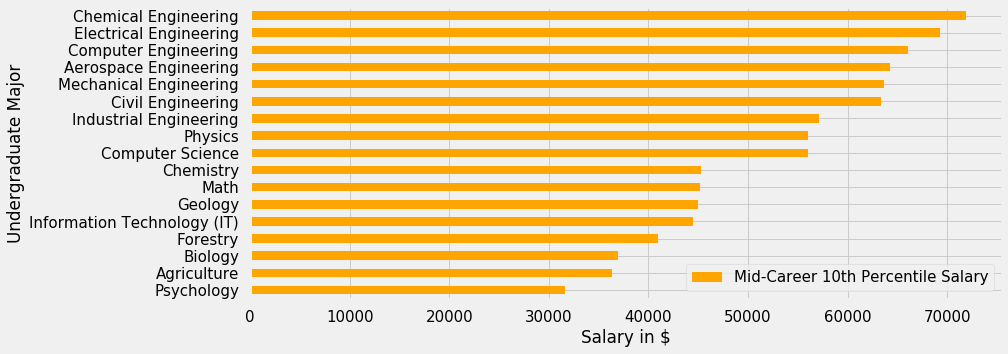

In [48]:
bottom = stem[['Undergraduate Major', 'Mid-Career 10th Percentile Salary']]
_ = bottom.sort_values('Mid-Career 10th Percentile Salary').plot(kind='barh', color = 'orange', fontsize=15, figsize=[12, 5]).set_xlabel('Salary in $')

At the lower levels of the mid-career level, the engineering degrees dominated again and psychology, agriculture, forestry, and biology all fell short again.

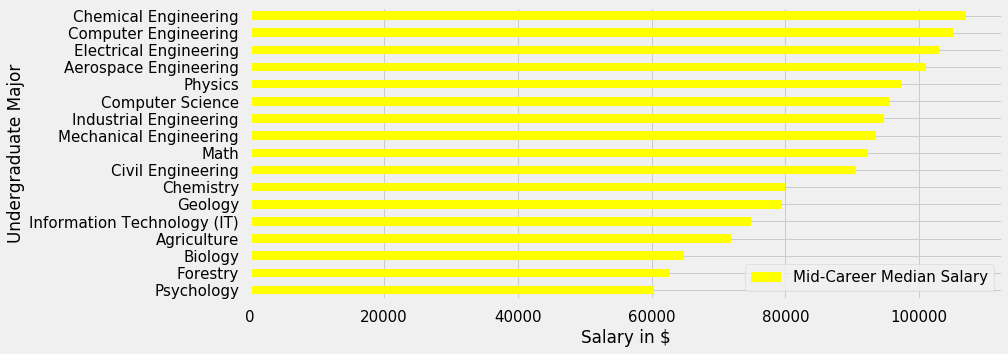

In [49]:
midlevel = stem[['Undergraduate Major', 'Mid-Career Median Salary']]
_ = midlevel.sort_values('Mid-Career Median Salary').plot(kind='barh', color = 'yellow', fontsize=15, figsize=[12, 5]).set_xlabel('Salary in $')

At the median salary for the mid-career level, physics and computer science jumped up, while psychology, forestry, biology, and agriculture all still fell short.

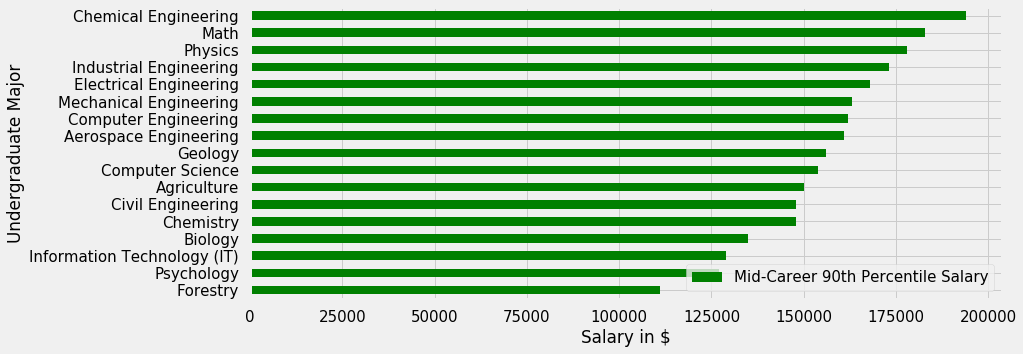

In [50]:
top = stem[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']]
_ = top.sort_values('Mid-Career 90th Percentile Salary').plot(kind='barh', color = 'green', fontsize=15, figsize=[12, 5]).set_xlabel('Salary in $')

At every level, Chemical Engineering dominated.  Math and Physics did best for the highest earners. Information technology fell a lot, as did Civil Engineering.  Computer Science saw massive fluctuation.  Math skyrocketed in earnings.  Let's take a look now at how much financial mobility there is from the starting to mid career salary range.

I'm also curious to find out how much the range in income is for these degrees at the mid-level career between the 10th and 90th percentiles.

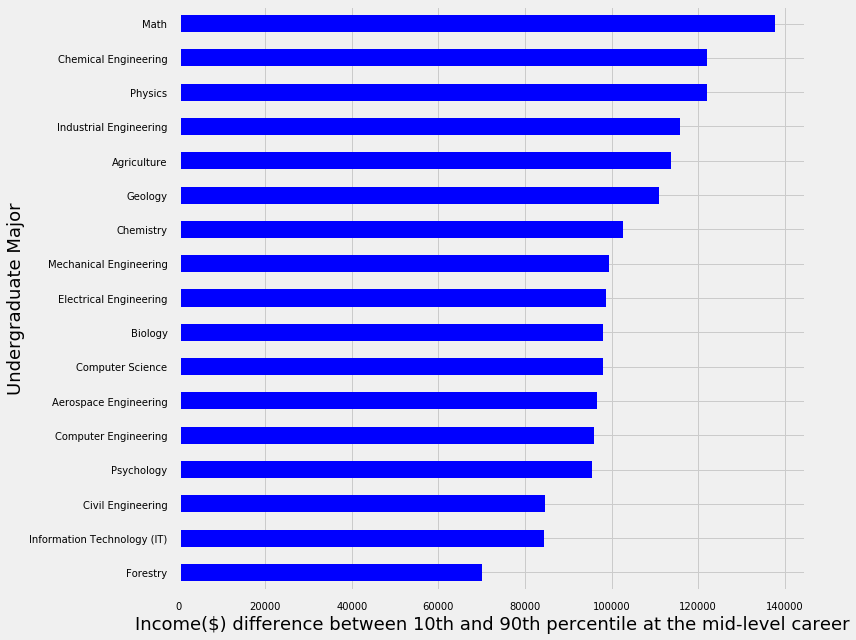

In [51]:
variance = stem['Mid-Career 90th Percentile Salary'] - stem['Mid-Career 10th Percentile Salary']
rcParams.update({'font.size': 15})
_ = variance.sort_values().plot(kind='barh', figsize=[10,10], fontsize=10, color='blue').set_xlabel('Income($) difference between 10th and 90th percentile at the mid-level career')

### Part 4. Financial Mobility

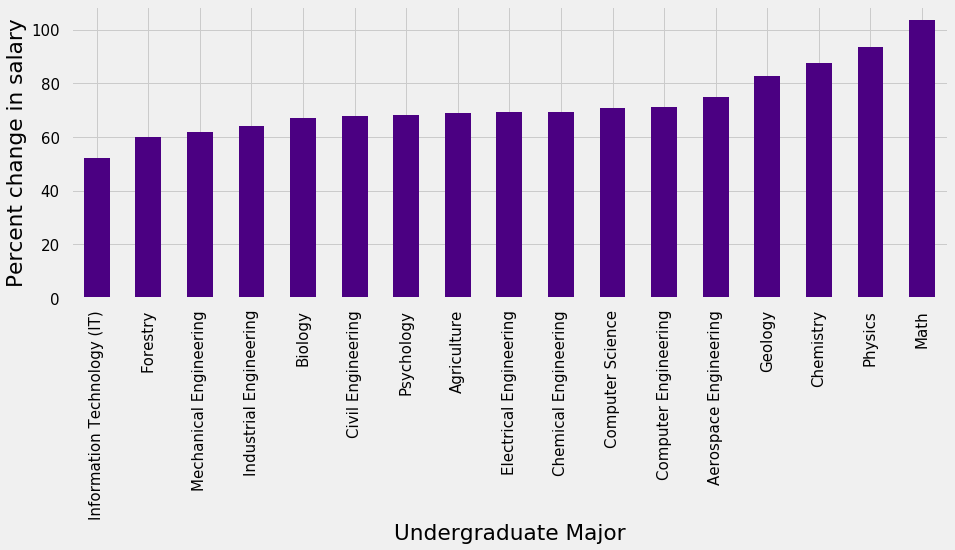

In [52]:
change = change[['Undergraduate Major', 'Percent change from Starting to Mid-Career Salary']]
change = change.sort_values('Percent change from Starting to Mid-Career Salary')
change.index=(change['Undergraduate Major'])
rcParams.update({'font.size': 18})
_ = change.plot(kind='bar', color = 'indigo', fontsize=15, figsize=[14, 5], legend=None).set_ylabel('Percent change in salary')

Math has the highest degree of mobility with over a whopping 100% increase in salary from the starting to mid career levels.  Interestingly, the first four degrees on the list aren't engineering degrees, despite engineering degrees earning the most at just about every level.

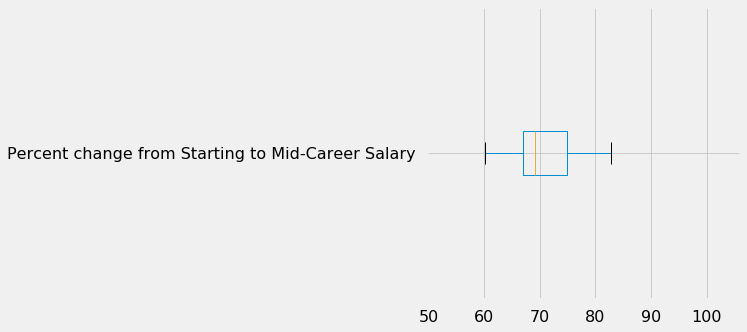

In [53]:
_ = change.plot(kind='box', figsize=[5,5], vert=False, title=(''))

The mean change in salary income is centered around 69%, while most changes in salary are between 60% and 82.5%.

To end things off, let's take a look at the financial mobility of all majors.

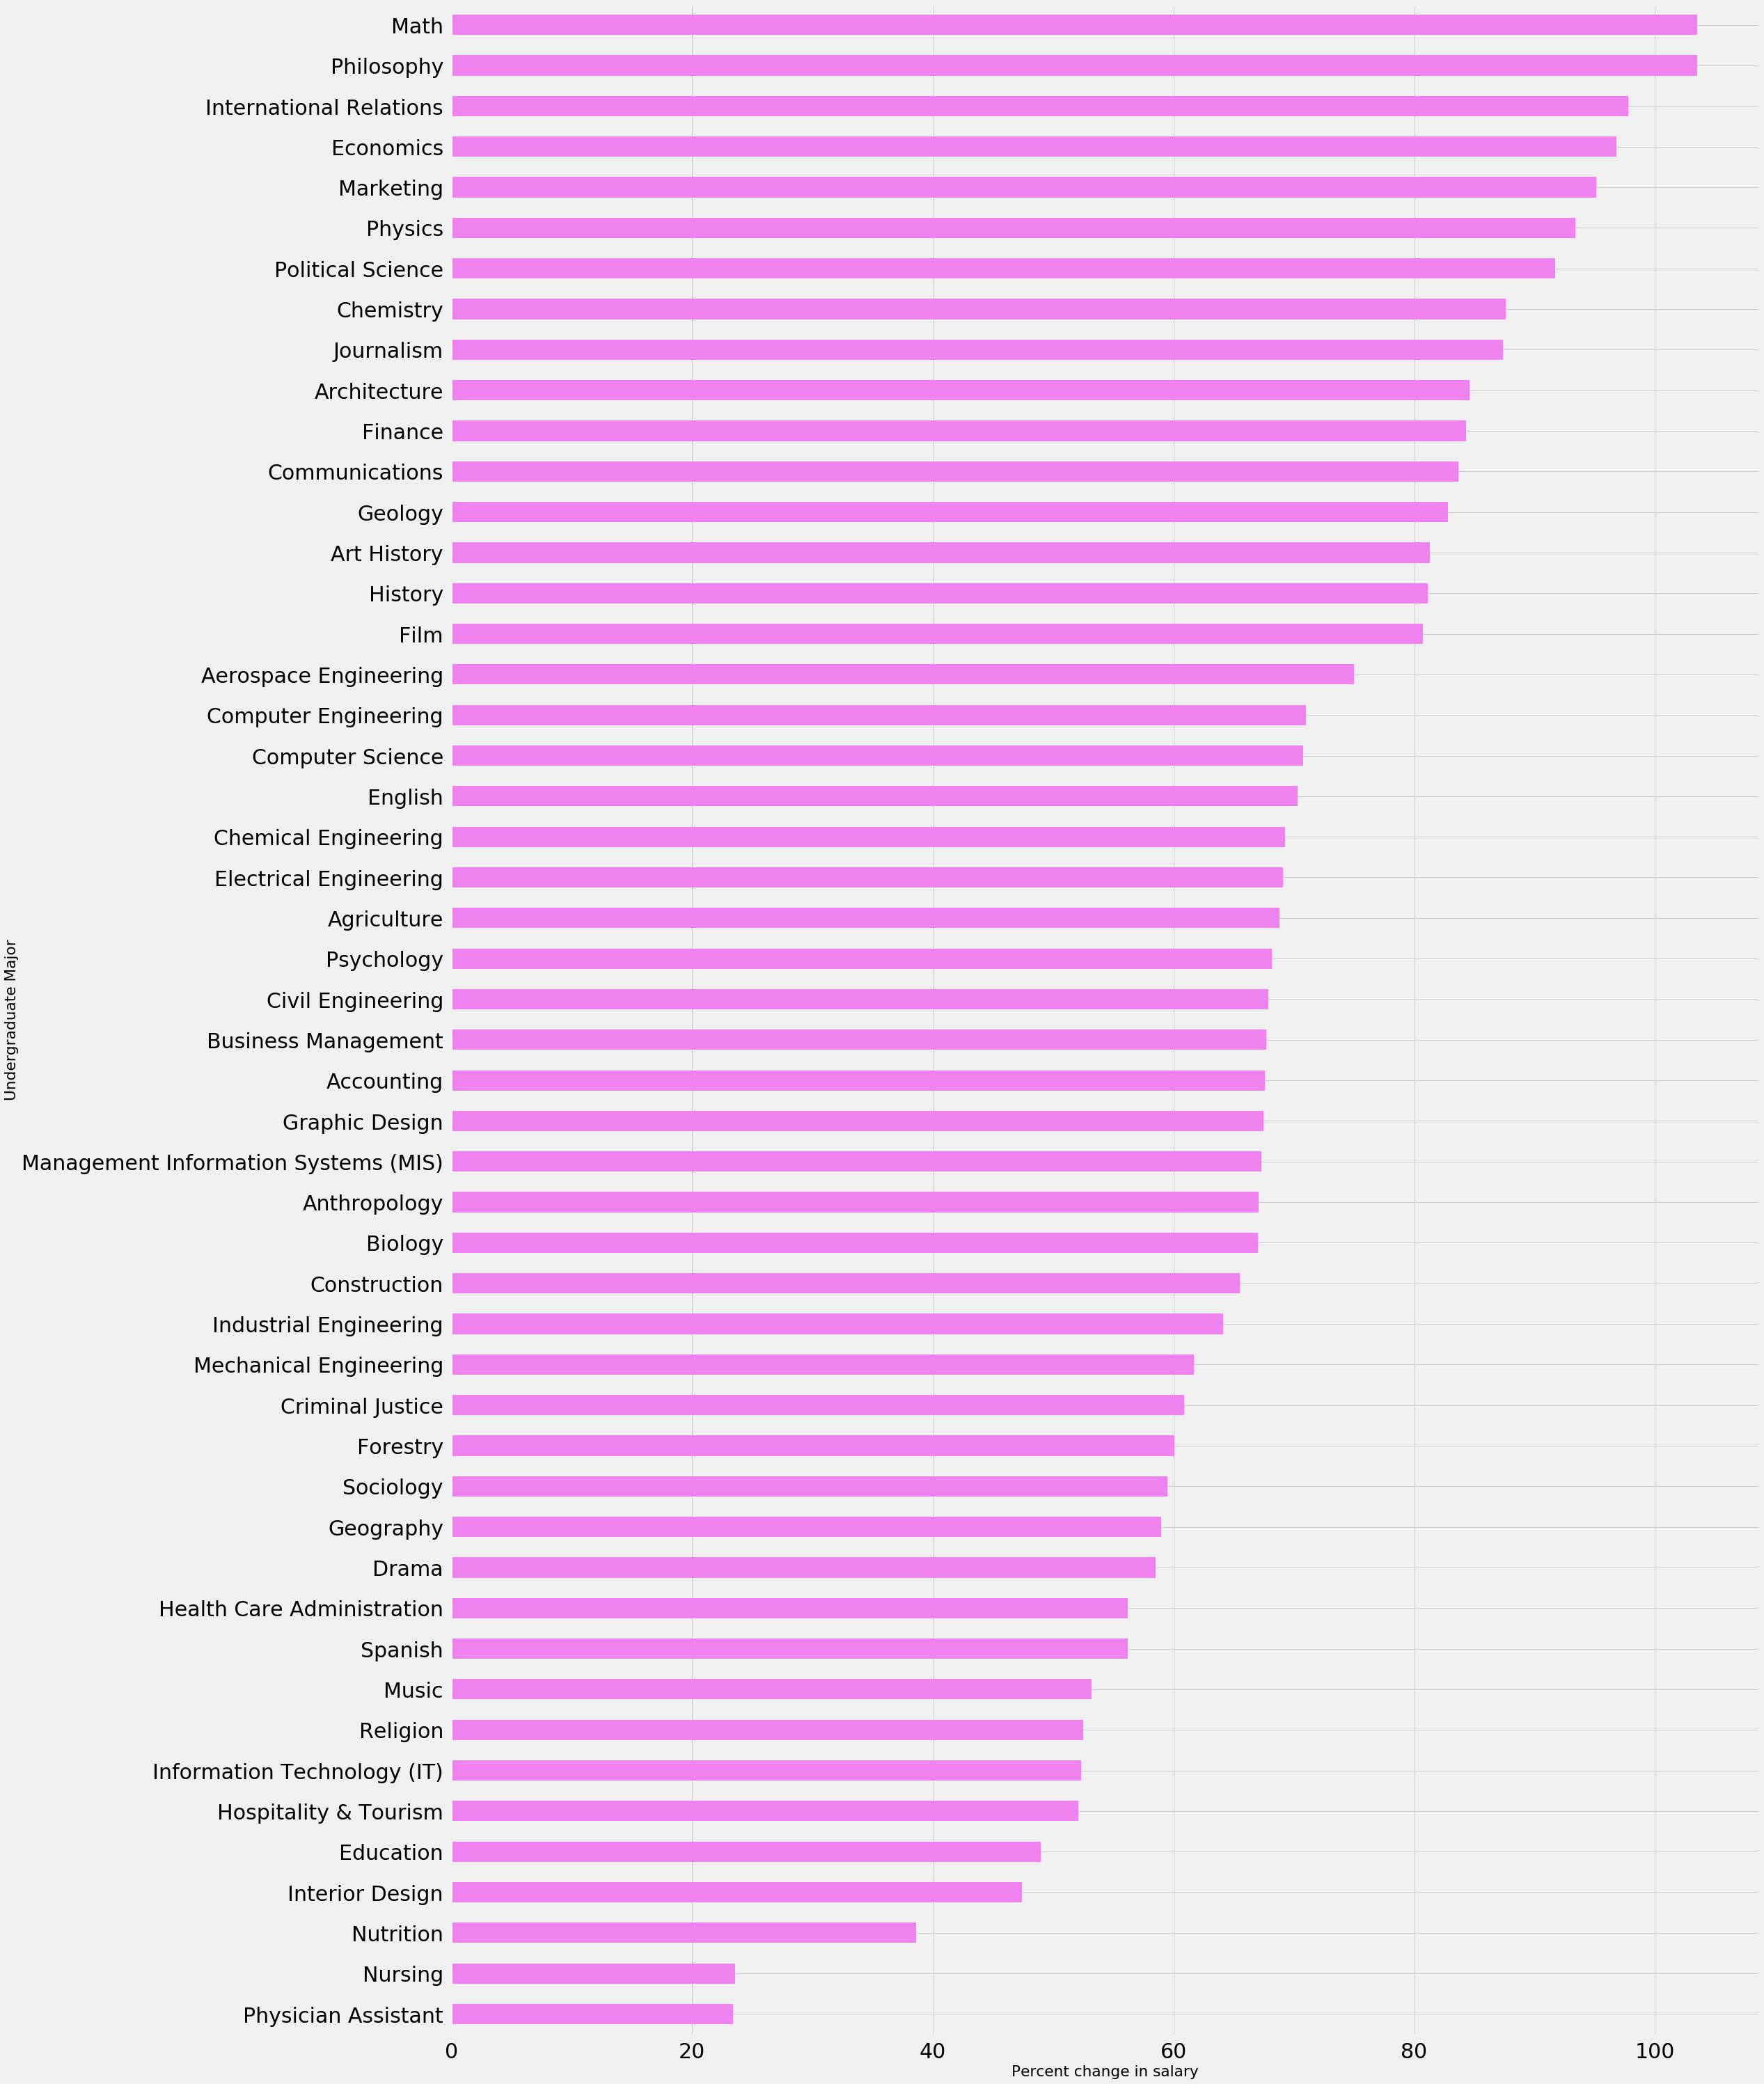

In [54]:
degrees = degrees[['Undergraduate Major', 'Percent change from Starting to Mid-Career Salary']]
degrees = degrees.sort_values('Percent change from Starting to Mid-Career Salary')
degrees.index=degrees['Undergraduate Major']
_ = degrees.plot(kind='barh', figsize=[30, 50], fontsize=30, color='violet', legend=None).set_xlabel('Percent change in salary')

Interestingly, lots of medical degrees don't see much financial mobility but some of the more abstract ones like Philosophy, Economics, Marketing, and International Relations do.

### Part 5. Conclusion

This project was mostly an experiment to familiarize myself with pandas and, particularly, matplotlib.  Section by section, here's what I found:

1) Graduates of private schools outperform gradutes of state schools at every level of income.

2) Graduates of Californian and Northeastern schools outperform graduates of  Western, Southern, and Mid-Western schools at every level of income.  The Northeast has a far higher proportion of private to state schools compared to the other four regions.

3) Engineering degrees earn more than other science and math degrees at every level but the highest echelons, at which point Math and Physics are also competitive.

4) The science and math degrees have more financial mobility than the engineering degrees. Additionally, the medical degrees have the least financial mobility while many of the social sciences have the highest degrees of financial mobility.

Thanks for reading!